In [1]:
import requests
from bs4 import BeautifulSoup
import lxml.html as html
from lxml import etree
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## parsing list of characters

websites 
https://walkingdead.fandom.com/wiki/TV_Series_Characters
and
https://walkingdead.fandom.com/wiki/The_Walking_Dead_(TV_Series)
are downloaded using chrome

In [86]:
with open('TV Series Characters _ Walking Dead Wiki _ Fandom.html', 'r', encoding='utf-8') as f:
    soup = BeautifulSoup(f.read(), 'html.parser')
    f.seek(0)
    xpath = html.fromstring(f.read())

In [87]:
toc_block = soup.select_one('#toc')
base_url = 'https://walkingdead.fandom.com/wiki/TV_Series_Characters#'

In [88]:
# worked for old version
#groups = {i.a.get_text().strip(): [j.a.get_text() for j in i.select('ol > li')] for i in soup.select('#toc > ol > li')}
# works for new version
groups = {i.a.get_text().strip(): [j.a.get_text() for j in i.select('ul > li')] for i in soup.select('#toc > ul > li')}

In [89]:
groups

{'1 King County, Georgia': ['1.1 Grimes Family',
  "1.2 Sheriff's Department",
  '1.3 Jones Family',
  '1.4 Siggard Family',
  '1.5 King County Residents'],
 '2 Atlanta, Georgia': ['2.1 Atlanta Camp Survivors',
  '2.1.1 Peletier Family',
  '2.1.2 Dixon Family',
  "2.1.3 Andrea's Family",
  '2.1.4 Morales Family',
  '2.2 Atlanta Nursing Home Survivors',
  "2.2.1 Felipe's Family"],
 '3 Center for Disease Control': ['3.1 Jenner Family'],
 '4 Greene Farm': ['4.1 Greene Family',
  "4.2 Otis' Family",
  '4.3 Greene Farm Residents'],
 '5 The Living': [],
 "6 Michonne's Group": ["6.1 Michonne's Family"],
 '7 West Georgia Correctional Facility': [],
 '8 National Guardsmen': [],
 '9 Woodbury, Georgia': ['9.1 Woodbury Survivors',
  '9.2 Blake Family',
  '9.3 Foster Family',
  '9.4 Richards Family',
  '9.5 Coleman Family'],
 "10 Tyreese's Group": ['10.1 Williams Family', "10.2 Allen's Family"],
 '11 Prison Newcomers': ['11.1 Samuels Family'],
 '12 Prison Outskirts': [],
 '13 Unnamed Apartment Buil

In [32]:
# worked for old version
#groups_id = {i.a.get_text().strip(): i.a['href'][len(base_url):] for i in soup.select('#toc > ol > li')}
# works for new version
groups_id = {i.a.get_text().strip(): i.a['href'][len(base_url):] for i in soup.select('#toc > ul > li')}

In [33]:
groups_id

{'1 King County, Georgia': 'King_County.2C_Georgia',
 '2 Atlanta, Georgia': 'Atlanta.2C_Georgia',
 '3 Center for Disease Control': 'Center_for_Disease_Control',
 '4 Greene Farm': 'Greene_Farm',
 '5 The Living': 'The_Living',
 "6 Michonne's Group": 'Michonne.27s_Group',
 '7 West Georgia Correctional Facility': 'West_Georgia_Correctional_Facility',
 '8 National Guardsmen': 'National_Guardsmen',
 '9 Woodbury, Georgia': 'Woodbury.2C_Georgia',
 "10 Tyreese's Group": 'Tyreese.27s_Group',
 '11 Prison Newcomers': 'Prison_Newcomers',
 '12 Prison Outskirts': 'Prison_Outskirts',
 '13 Unnamed Apartment Building': 'Unnamed_Apartment_Building',
 "14 Martinez's Group": 'Martinez.27s_Group',
 '15 Post-Prison Survivors': 'Post-Prison_Survivors',
 '16 Terminus': 'Terminus',
 "17 St. Sarah's Church": 'St._Sarah.27s_Church',
 '18 Grady Memorial Hospital': 'Grady_Memorial_Hospital',
 '19 Alexandria Safe-Zone': 'Alexandria_Safe-Zone',
 '20 The Wolves': 'The_Wolves',
 '21 Georgia Woods': 'Georgia_Woods',
 '2

In [34]:
# worked for old version
#subgroups_id = {i.a.get_text().strip(): i.a['href'][len(base_url):] for i in soup.select('#toc > ol > li ol > li')}
#works for new version
subgroups_id = {i.a.get_text().strip(): i.a['href'][len(base_url):] for i in soup.select('#toc > ul > li ul > li')}

In [35]:
subgroups_id

{'1.1 Grimes Family': 'Grimes_Family',
 "1.2 Sheriff's Department": 'Sheriff.27s_Department',
 '1.3 Jones Family': 'Jones_Family',
 '1.4 Siggard Family': 'Siggard_Family',
 '1.5 King County Residents': 'King_County_Residents',
 '2.1 Atlanta Camp Survivors': 'Atlanta_Camp_Survivors',
 '2.1.1 Peletier Family': 'Peletier_Family',
 '2.1.2 Dixon Family': 'Dixon_Family',
 "2.1.3 Andrea's Family": 'Andrea.27s_Family',
 '2.1.4 Morales Family': 'Morales_Family',
 '2.2 Atlanta Nursing Home Survivors': 'Atlanta_Nursing_Home_Survivors',
 "2.2.1 Felipe's Family": 'Felipe.27s_Family',
 '3.1 Jenner Family': 'Jenner_Family',
 '4.1 Greene Family': 'Greene_Family',
 "4.2 Otis' Family": 'Otis.27_Family',
 '4.3 Greene Farm Residents': 'Greene_Farm_Residents',
 "6.1 Michonne's Family": 'Michonne.27s_Family',
 '9.1 Woodbury Survivors': 'Woodbury_Survivors',
 '9.2 Blake Family': 'Blake_Family',
 '9.3 Foster Family': 'Foster_Family',
 '9.4 Richards Family': 'Richards_Family',
 '9.5 Coleman Family': 'Coleman_F

In [90]:
all_people = []
for group, subgroups in groups.items():
    print(group)
    table_sel = f'//*[@id="{groups_id[group]}"]/parent::*/following-sibling::*[1]'
    xpath_table = xpath.xpath(table_sel)[0]
    print(' '*2+table_sel)
    xpath_table = xpath.xpath(table_sel)[0]
    if xpath_table.tag == 'table':
        people_t = BeautifulSoup(etree.tostring(xpath_table), 'html.parser')
        people = [{'id': i['title'], 'link': i['href'], 'group': group, 'subgroup': None} for i in people_t.select('tbody > tr > td > table > tbody > tr > td > div > div > a')]
        for p in people:
            print(' '*4+p['id'])
        all_people += people
        
    for subgroup in subgroups:
        print(' '*2+subgroup)
        table_sel = f'//*[@id="{subgroups_id[subgroup]}"]/parent::*/following-sibling::*[1]'
        print(' '*2+table_sel)
        xpath_table = xpath.xpath(table_sel)[0]
        if xpath_table.tag != 'table':
            print(' '*2+f'next is {xpath_table.tag}')
            continue
        people_t = BeautifulSoup(etree.tostring(xpath_table), 'html.parser')
        people = [{'id': i['title'], 'link': i['href'], 'group': group, 'subgroup': subgroup} for i in people_t.select('tbody > tr > td > table > tbody > tr > td > div > div > a')]
        for p in people:
            print(' '*4+p['id'])
        all_people += people

1 King County, Georgia
  //*[@id="King_County.2C_Georgia"]/parent::*/following-sibling::*[1]
  1.1 Grimes Family
  //*[@id="Grimes_Family"]/parent::*/following-sibling::*[1]
    Judith Grimes (TV Series)
    Rick Grimes Jr. (TV Series)
    Rick Grimes (TV Series)
    Carl Grimes (TV Series)
    Lori Grimes (TV Series)
  1.2 Sheriff's Department
  //*[@id="Sheriff.27s_Department"]/parent::*/following-sibling::*[1]
    Lambert Kendal (TV Series)
    Shane Walsh (TV Series)
    Leon Basset (TV Series)
  1.3 Jones Family
  //*[@id="Jones_Family"]/parent::*/following-sibling::*[1]
    Morgan Jones (TV Series)
    Jenny Jones (TV Series)
    Duane Jones (TV Series)
  1.4 Siggard Family
  //*[@id="Siggard_Family"]/parent::*/following-sibling::*[1]
    Mr. Siggard (TV Series)
    Mrs. Siggard (TV Series)
  1.5 King County Residents
  //*[@id="King_County_Residents"]/parent::*/following-sibling::*[1]
    Paula (Season 2)
2 Atlanta, Georgia
  //*[@id="Atlanta.2C_Georgia"]/parent::*/following-sib

    Betsy (TV Series)
    David (Season 6)
20 The Wolves
  //*[@id="The_Wolves"]/parent::*/following-sibling::*[1]
    Owen (Wolf)
    Aphid (TV Series)
21 Georgia Woods
  //*[@id="Georgia_Woods"]/parent::*/following-sibling::*[1]
    Eastman (TV Series)
22 The Saviors
  //*[@id="The_Saviors"]/parent::*/following-sibling::*[1]
    Negan (TV Series)
    Alden (TV Series)
    Gracie (TV Series)
    Amber (TV Series)
    Tanya (TV Series)
    Mark (TV Series)
    Gina (Savior)
    Quan (TV Series)
    Potter (TV Series)
    José (TV Series)
    Brooke (TV Series)
    Mel (TV Series)
    John (TV Series)
    Marcus (TV Series)
    Jonah (TV Series)
    Alice (TV Series)
    Laura (TV Series)
    Brandon (TV Series)
    Frankie (TV Series)
    D.J. (TV Series)
    Richie (TV Series)
    Regina (TV Series)
    Jed (TV Series)
    Norris (TV Series)
    Arat (TV Series)
    Justin (TV Series)
    Simon (TV Series)
    Duke (Wrath)
    Lance (TV Series)
    Gary (TV Series)
    Reilly (TV Seri

In [91]:
groups.items()

dict_items([('1 King County, Georgia', ['1.1 Grimes Family', "1.2 Sheriff's Department", '1.3 Jones Family', '1.4 Siggard Family', '1.5 King County Residents']), ('2 Atlanta, Georgia', ['2.1 Atlanta Camp Survivors', '2.1.1 Peletier Family', '2.1.2 Dixon Family', "2.1.3 Andrea's Family", '2.1.4 Morales Family', '2.2 Atlanta Nursing Home Survivors', "2.2.1 Felipe's Family"]), ('3 Center for Disease Control', ['3.1 Jenner Family']), ('4 Greene Farm', ['4.1 Greene Family', "4.2 Otis' Family", '4.3 Greene Farm Residents']), ('5 The Living', []), ("6 Michonne's Group", ["6.1 Michonne's Family"]), ('7 West Georgia Correctional Facility', []), ('8 National Guardsmen', []), ('9 Woodbury, Georgia', ['9.1 Woodbury Survivors', '9.2 Blake Family', '9.3 Foster Family', '9.4 Richards Family', '9.5 Coleman Family']), ("10 Tyreese's Group", ['10.1 Williams Family', "10.2 Allen's Family"]), ('11 Prison Newcomers', ['11.1 Samuels Family']), ('12 Prison Outskirts', []), ('13 Unnamed Apartment Building', [

In [92]:
people_html = {p['link']: requests.get(p['link']).content for p in all_people}

In [93]:
people_soup = {p['link']: BeautifulSoup(people_html[p['link']], 'html.parser') for p in all_people}

In [94]:
for p in all_people:
    soup = people_soup[p['link']]
    aside = soup.select_one('aside')
    p['status'] = aside.select_one('aside > div[data-source="status"] > div').get_text()
    first_ep = aside.select('aside > div[data-source="first"] > div > a')
    p['first_ep'] = first_ep[0].get_text()
    p['first_ep_link'] = first_ep[0]['href'][len('/wiki/'):]
    more_text = aside.select('aside > div[data-source="first"] > div > small')
    if len(more_text) > 0:
        p['was_alive'] = more_text[0].get_text() != '(Zombified)'
    else:
        p['was_alive'] = True
    death_ep = aside.select('div[data-source="death episode"] > div > a')
    if len(death_ep) > 0:
        p['death_ep'] = death_ep[0].get_text()
        p['death_ep_link'] = death_ep[0]['href'][len('/wiki/'):]
    else:
        p['death_ep'] = None

## parsing types of characters

In [95]:
#mw-content-text > div:nth-child(28) > div:nth-child(2)
with open('The Walking Dead (TV Series) _ Walking Dead Wiki _ Fandom.html', 'r', encoding='utf-8') as f:
    soup = BeautifulSoup(f.read(), 'html.parser')
    f.seek(0)
    xpath = html.fromstring(f.read())

In [96]:
main_chars = {}
for t_row in soup.select_one('div[title="Main Cast"]').select('table > tbody > tr')[1:]:
    td = t_row.select('td')[1]
    main_chars[td.a['title']] = td.get_text().strip()

In [97]:
support_chars = {}
for t_row in soup.select_one('div[title="Supporting Cast"]').select('table > tbody > tr')[1:]:
    td = t_row.select('td')[1]
    support_chars[td.a['title']] = td.get_text().strip()

In [98]:
co_stars = {}
for t_row in soup.select_one('div[title="Co-Stars"]').select('table > tbody > tr')[1:]:
    td = t_row.select('td')[1]
    co_stars[td.a['title']] = td.get_text().strip()

In [99]:
co_stars

{'Barbara (TV Series)': 'Barbara',
 'Dianne (TV Series)': 'Dianne',
 'Kal (TV Series)': 'Kal',
 'Marco (TV Series)': 'Marco',
 'Laura (TV Series)': 'Laura',
 'Regina (TV Series)': 'Regina',
 'Arat (TV Series)': 'Arat',
 'Bob Miller (TV Series)': 'Bob Miller',
 'Kent (TV Series)': 'Kent',
 'Anna (TV Series)': 'Anna',
 'Gary (TV Series)': 'Gary',
 'Bruce (TV Series)': 'Bruce',
 'Mikey (TV Series)': 'Mikey',
 'Alvaro (TV Series)': 'Alvaro',
 'Daniel (TV Series)': 'Daniel',
 'Francine (TV Series)': 'Francine',
 'David (Season 7)': 'David',
 'Isabelle (TV Series)': 'Isabelle',
 'Joseph (TV Series)': 'Joseph',
 'Natalie Miller (TV Series)': 'Natalie Miller',
 'Betsy (TV Series)': 'Betsy',
 'Nicholas (TV Series)': 'Nicholas',
 'David (Season 6)': 'David',
 'Annie (TV Series)': 'Annie',
 'Sturgess (TV Series)': 'Sturgess',
 'Barnes (TV Series)': 'Barnes',
 'Erin (TV Series)': 'Erin',
 'Shelly Neudermeyer (TV Series)': 'Shelly Neudermeyer',
 'Pete Anderson (TV Series)': 'Pete Anderson',
 'Lambe

In [100]:
set(main_chars.keys()).intersection(set(support_chars.keys()))

set()

In [101]:
set(main_chars.keys()).intersection(set(co_stars.keys()))

set()

In [102]:
set(support_chars.keys()).intersection(set(co_stars.keys()))

set()

In [103]:
df = pd.DataFrame(all_people)

In [104]:
df['main_character'] = df['id'].isin(list(main_chars.keys()))

In [105]:
df['support_character'] = df['id'].isin(list(support_chars.keys()))

In [106]:
df['co_star'] = df['id'].isin(list(co_stars.keys()))

In [107]:
df['char_type'] = None

In [108]:
df.loc[df['co_star'], 'char_type'] = 'Co-Star'
df.loc[df['main_character'], 'char_type'] = 'Main'
df.loc[df['support_character'], 'char_type'] = 'Support'

## parsing episodes

In [55]:
#mw-content-text > div:nth-child(28) > div:nth-child(2)
with open('The Walking Dead (TV Series) _ Walking Dead Wiki _ Fandom.html', 'r', encoding='utf-8') as f:
    soup = BeautifulSoup(f.read(), 'html.parser')
    f.seek(0)
    xpath = html.fromstring(f.read())

In [56]:
episodes = []
seasons = [f'Season {i}' for i in range(1, 11)]
for season in seasons:
    for a_row in soup.select_one(f'div[title="{season}"]').select('table > tbody > tr')[1:]:
        cells = a_row.select('td')
        tds = t_row.select('td')
        episodes.append({'episode': int(cells[0].get_text().strip()[:-1]), 
                         'season': season,
                         'name': cells[1].select('a')[0].get_text().strip(),
                         'link': cells[1].a['href']})

In [57]:
episodes

[{'episode': 1,
  'season': 'Season 1',
  'name': 'Days Gone Bye',
  'link': 'https://walkingdead.fandom.com/wiki/Days_Gone_Bye_(TV_Series)'},
 {'episode': 2,
  'season': 'Season 1',
  'name': 'Guts',
  'link': 'https://walkingdead.fandom.com/wiki/Guts'},
 {'episode': 3,
  'season': 'Season 1',
  'name': 'Tell It to the Frogs',
  'link': 'https://walkingdead.fandom.com/wiki/Tell_It_to_the_Frogs'},
 {'episode': 4,
  'season': 'Season 1',
  'name': 'Vatos',
  'link': 'https://walkingdead.fandom.com/wiki/Vatos_(Episode)'},
 {'episode': 5,
  'season': 'Season 1',
  'name': 'Wildfire',
  'link': 'https://walkingdead.fandom.com/wiki/Wildfire'},
 {'episode': 6,
  'season': 'Season 1',
  'name': 'TS-19',
  'link': 'https://walkingdead.fandom.com/wiki/TS-19'},
 {'episode': 1,
  'season': 'Season 2',
  'name': 'What Lies Ahead',
  'link': 'https://walkingdead.fandom.com/wiki/What_Lies_Ahead'},
 {'episode': 2,
  'season': 'Season 2',
  'name': 'Bloodletting',
  'link': 'https://walkingdead.fandom

In [58]:
webisodes = []
seasons = ['Torn Apart', 'Cold Storage', 'The Oath']
for season in seasons:
    for a_row in soup.select_one(f'div[title="{season}"]').select('table > tbody > tr')[1:]:
        cells = a_row.select('td')
        tds = t_row.select('td')
        webisodes.append({'episode': int(cells[0].get_text().strip()[:-1]), 
                         'season': season,
                         'name': cells[1].select('a')[0].get_text().strip(),
                         'link': cells[1].a['href']})

In [59]:
webisodes

[{'episode': 1,
  'season': 'Torn Apart',
  'name': 'A New Day',
  'link': 'https://walkingdead.fandom.com/wiki/A_New_Day_(Webisodes)'},
 {'episode': 2,
  'season': 'Torn Apart',
  'name': 'Family Matters',
  'link': 'https://walkingdead.fandom.com/wiki/Family_Matters'},
 {'episode': 3,
  'season': 'Torn Apart',
  'name': 'Domestic Violence',
  'link': 'https://walkingdead.fandom.com/wiki/Domestic_Violence'},
 {'episode': 4,
  'season': 'Torn Apart',
  'name': 'Neighborly Advice',
  'link': 'https://walkingdead.fandom.com/wiki/Neighborly_Advice'},
 {'episode': 5,
  'season': 'Torn Apart',
  'name': 'Step Mother',
  'link': 'https://walkingdead.fandom.com/wiki/Step_Mother'},
 {'episode': 6,
  'season': 'Torn Apart',
  'name': 'Everything Dies',
  'link': 'https://walkingdead.fandom.com/wiki/Everything_Dies'},
 {'episode': 1,
  'season': 'Cold Storage',
  'name': 'Hide and Seek',
  'link': 'https://walkingdead.fandom.com/wiki/Hide_and_Seek'},
 {'episode': 2,
  'season': 'Cold Storage',
 

In [60]:
df_eps = pd.DataFrame(episodes)

In [61]:
df_eps['episode_total'] = df_eps.index + 1

In [62]:
df_eps['title'] = df_eps['link'].str[len('https://walkingdead.fandom.com/wiki/'):]

In [63]:
name2ep_num = df_eps.copy().set_index('title').to_dict(orient='dict')['episode_total']

In [64]:
name2ep_num

{'Days_Gone_Bye_(TV_Series)': 1,
 'Guts': 2,
 'Tell_It_to_the_Frogs': 3,
 'Vatos_(Episode)': 4,
 'Wildfire': 5,
 'TS-19': 6,
 'What_Lies_Ahead': 7,
 'Bloodletting': 8,
 'Save_the_Last_One': 9,
 'Cherokee_Rose': 10,
 'Chupacabra': 11,
 'Secrets': 12,
 'Pretty_Much_Dead_Already': 13,
 'Nebraska_(Episode)': 14,
 'Triggerfinger': 15,
 '18_Miles_Out': 16,
 'Judge,_Jury,_Executioner': 17,
 'Better_Angels': 18,
 'Beside_the_Dying_Fire': 19,
 'Seed': 20,
 'Sick': 21,
 'Walk_With_Me': 22,
 'Killer_Within': 23,
 'Say_the_Word': 24,
 'Hounded': 25,
 'When_the_Dead_Come_Knocking': 26,
 'Made_to_Suffer_(TV_Series)': 27,
 'The_Suicide_King': 28,
 'Home': 29,
 'I_Ain%27t_a_Judas': 30,
 'Clear': 31,
 'Arrow_on_the_Doorpost': 32,
 'Prey': 33,
 'This_Sorrowful_Life_(TV_Series)': 34,
 'Welcome_to_the_Tombs': 35,
 '30_Days_Without_An_Accident': 36,
 'Infected': 37,
 'Isolation': 38,
 'Indifference': 39,
 'Internment': 40,
 'Live_Bait': 41,
 'Dead_Weight': 42,
 'Too_Far_Gone_(TV_Series)': 43,
 'After': 44,

In [65]:
webisode_links = set([i['link'][len('https://walkingdead.fandom.com/wiki/'):] for i in webisodes])

In [66]:
webisode_links

{'A_New_Day_(Webisodes)',
 'Alone_(Webisodes)',
 'Bond',
 'Choice',
 'Domestic_Violence',
 'Everything_Dies',
 'Family_Matters',
 'Hide_and_Seek',
 'Keys_to_the_Kingdom',
 'Neighborly_Advice',
 'Parting_Shots',
 'Step_Mother',
 'The_Chosen_Ones'}

In [67]:
set(df_eps['title'].unique()).intersection(webisode_links)

set()

### removing people from webisodes

In [109]:
df = df[~df['first_ep_link'].isin(webisode_links)]

In [110]:
df[df['first_ep_link'].str.contains('Everything_Dies')]

,id,link,group,subgroup,status,first_ep,first_ep_link,was_alive,death_ep,death_ep_link,main_character,support_character,co_star,char_type


In [111]:
df_eps['title'] = df_eps['link'].str[len('https://walkingdead.fandom.com/wiki/'):]

In [112]:
df['first_ep_num'] = df['first_ep_link'].apply(lambda x: name2ep_num[x])
df['death_ep_num'] = df['death_ep_link'].apply(lambda x: name2ep_num[x] if x in name2ep_num else None)

In [113]:
df['ttl_num'] = df['death_ep_num'] - df['first_ep_num']

In [114]:
df_eps['season_num'] = df_eps['season'].str.replace('Season ', ' ', regex=False).astype(int)

## dataset is complete

In [75]:
df_eps

,episode,season,name,link,episode_total,title,season_num
0,1,Season 1,Days Gone Bye,https://walkingdead.fandom.com/wiki/Days_Gone_...,1,Days_Gone_Bye_(TV_Series),1
1,2,Season 1,Guts,https://walkingdead.fandom.com/wiki/Guts,2,Guts,1
2,3,Season 1,Tell It to the Frogs,https://walkingdead.fandom.com/wiki/Tell_It_to...,3,Tell_It_to_the_Frogs,1
3,4,Season 1,Vatos,https://walkingdead.fandom.com/wiki/Vatos_(Epi...,4,Vatos_(Episode),1
4,5,Season 1,Wildfire,https://walkingdead.fandom.com/wiki/Wildfire,5,Wildfire,1
...,...,...,...,...,...,...,...
148,18,Season 10,Find Me,https://walkingdead.fandom.com/wiki/Find_Me,149,Find_Me,10
149,19,Season 10,One More,https://walkingdead.fandom.com/wiki/One_More,150,One_More,10
150,20,Season 10,Splinter,https://walkingdead.fandom.com/wiki/Splinter,151,Splinter,10
151,21,Season 10,Diverged,https://walkingdead.fandom.com/wiki/Diverged,152,Diverged,10


In [115]:
df

,id,link,group,subgroup,status,first_ep,first_ep_link,was_alive,death_ep,death_ep_link,main_character,support_character,co_star,char_type,first_ep_num,death_ep_num,ttl_num
0,Judith Grimes (TV Series),https://walkingdead.fandom.com/wiki/Judith_Gri...,"1 King County, Georgia",1.1 Grimes Family,Alive,Killer Within,Killer_Within,True,None,NaN,False,True,False,Support,23,NaN,NaN
1,Rick Grimes Jr. (TV Series),https://walkingdead.fandom.com/wiki/Rick_Grime...,"1 King County, Georgia",1.1 Grimes Family,Alive,Who Are You Now?,Who_Are_You_Now%3F,True,None,NaN,False,False,False,None,121,NaN,NaN
2,Rick Grimes (TV Series),https://walkingdead.fandom.com/wiki/Rick_Grime...,"1 King County, Georgia",1.1 Grimes Family,Unknown,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,None,NaN,True,False,False,Main,1,NaN,NaN
3,Carl Grimes (TV Series),https://walkingdead.fandom.com/wiki/Carl_Grime...,"1 King County, Georgia",1.1 Grimes Family,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,Honor,Honor,True,False,False,Main,1,108.0,107.0
4,Lori Grimes (TV Series),https://walkingdead.fandom.com/wiki/Lori_Grime...,"1 King County, Georgia",1.1 Grimes Family,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,Killer Within,Killer_Within,True,False,False,Main,1,23.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Doug (TV Series),https://walkingdead.fandom.com/wiki/Doug_(TV_S...,38 Walkers,None,Dead,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,False,False,None,13,13.0,0.0
439,Louise Bush (TV Series),https://walkingdead.fandom.com/wiki/Louise_Bus...,38 Walkers,None,Dead,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,False,False,None,13,13.0,0.0
440,Wayne Dunlap (TV Series),https://walkingdead.fandom.com/wiki/Wayne_Dunl...,38 Walkers,None,Dead,Guts,Guts,False,Guts,Guts,False,False,False,None,2,2.0,0.0
441,Summer (TV Series),https://walkingdead.fandom.com/wiki/Summer_(TV...,38 Walkers,None,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),False,Days Gone Bye,Days_Gone_Bye_(TV_Series),False,False,False,None,1,1.0,0.0


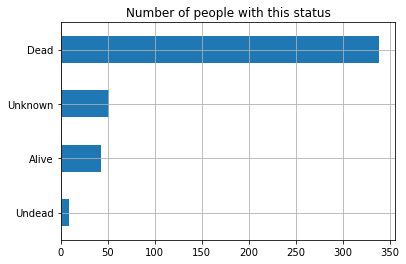

In [119]:
df['status'].value_counts()[::-1].plot(kind='barh', title='Number of people with this status', grid=True)

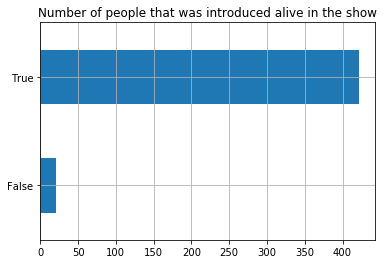

In [120]:
df['was_alive'].value_counts()[::-1].plot(kind='barh', title='Number of people that was introduced alive in the show', grid=True)

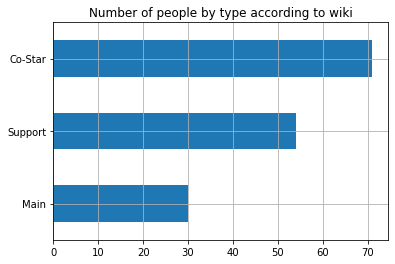

In [121]:
df['char_type'].value_counts()[::-1].plot(kind='barh', title='Number of people by type according to wiki', grid=True)

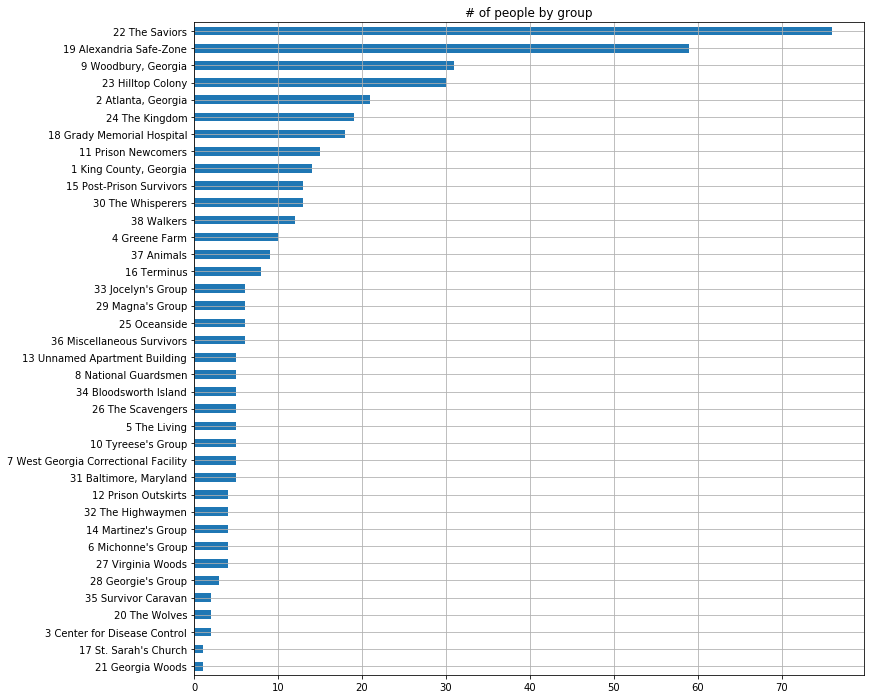

In [122]:
df['group'].value_counts()[::-1].plot(kind='barh', figsize=(12, 12), title='# of people by group', grid=True)

In [123]:
group_st_df_all = pd.crosstab(df['group'], df['status'])

In [124]:
group_st_df = pd.crosstab(df[df['was_alive']]['group'], df[df['was_alive']]['status'])

In [125]:
type_st_df = pd.crosstab(df[df['was_alive']]['char_type'], df[df['was_alive']]['status'])

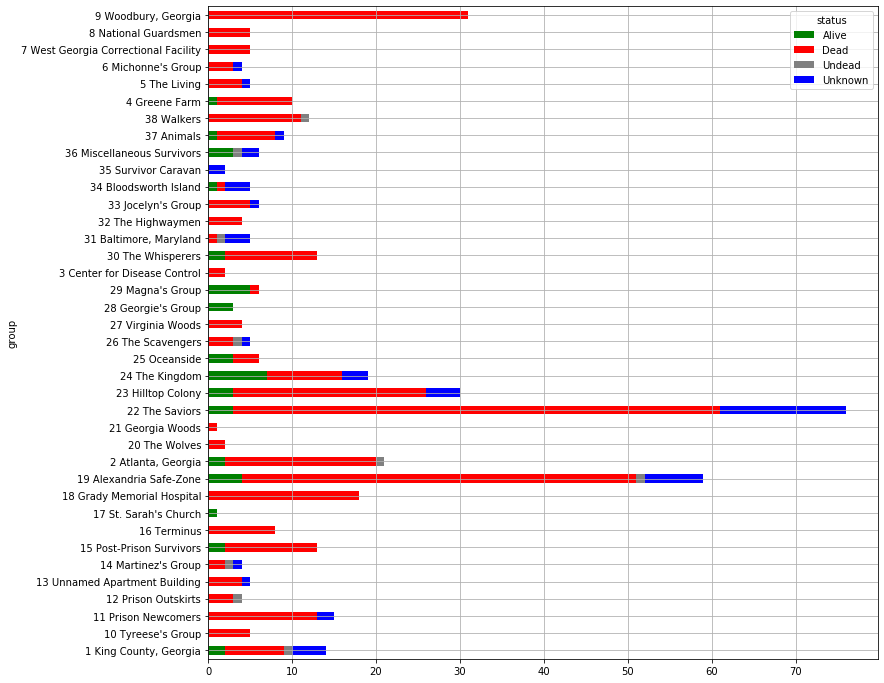

In [126]:
group_st_df_all.plot(kind='barh', stacked=True, figsize=(12, 12), color=['green', 'red', 'gray', 'blue'], grid=True)

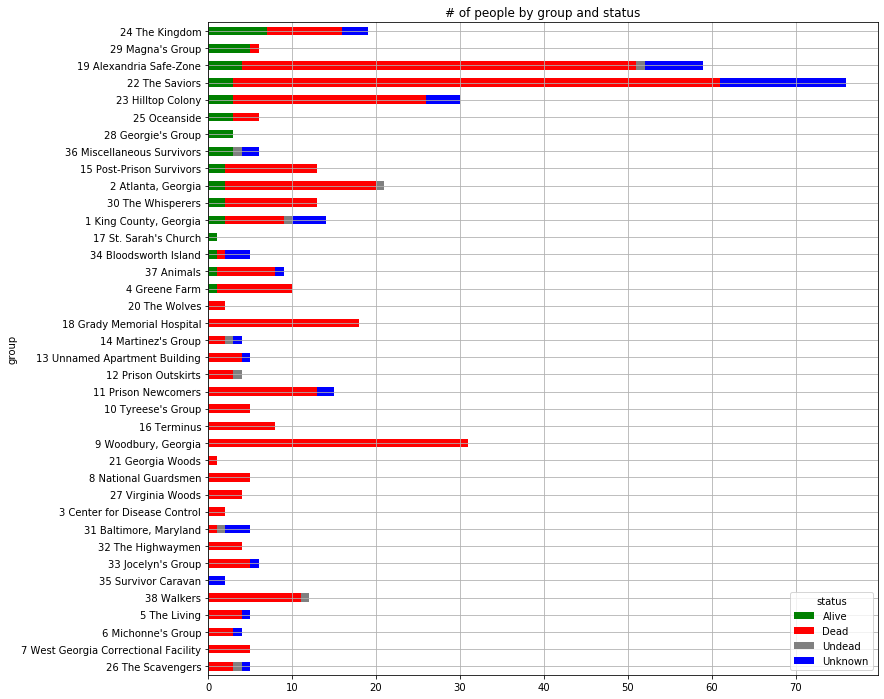

In [127]:
group_st_df_all.sort_values('Alive').plot(kind='barh', stacked=True, figsize=(12, 12), color=['green', 'red', 'gray', 'blue'], grid=True, title='# of people by group and status')

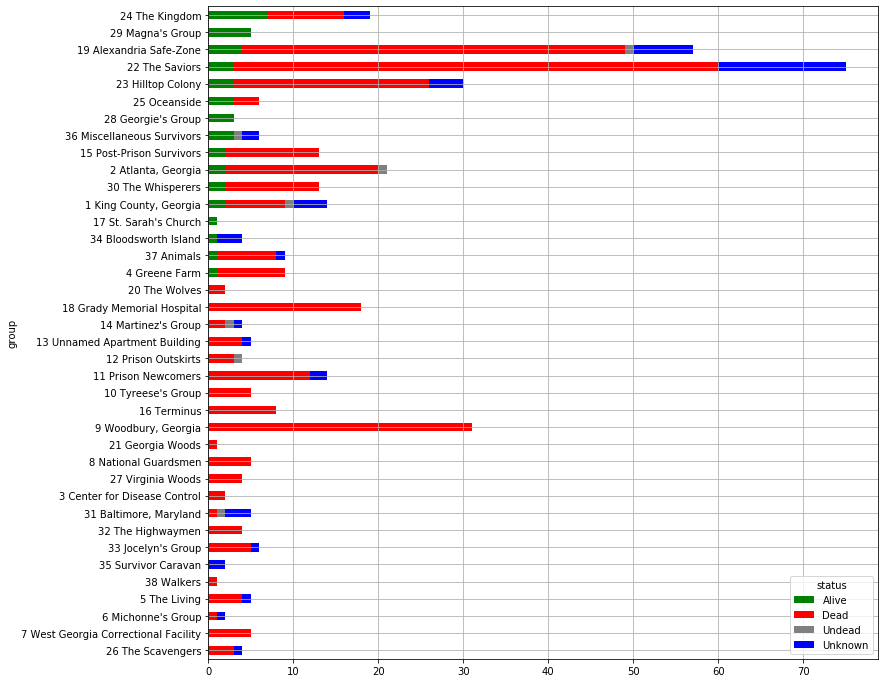

In [128]:
group_st_df.sort_values('Alive').plot(kind='barh', stacked=True, figsize=(12, 12), color=['green', 'red', 'gray', 'blue'], grid=True)

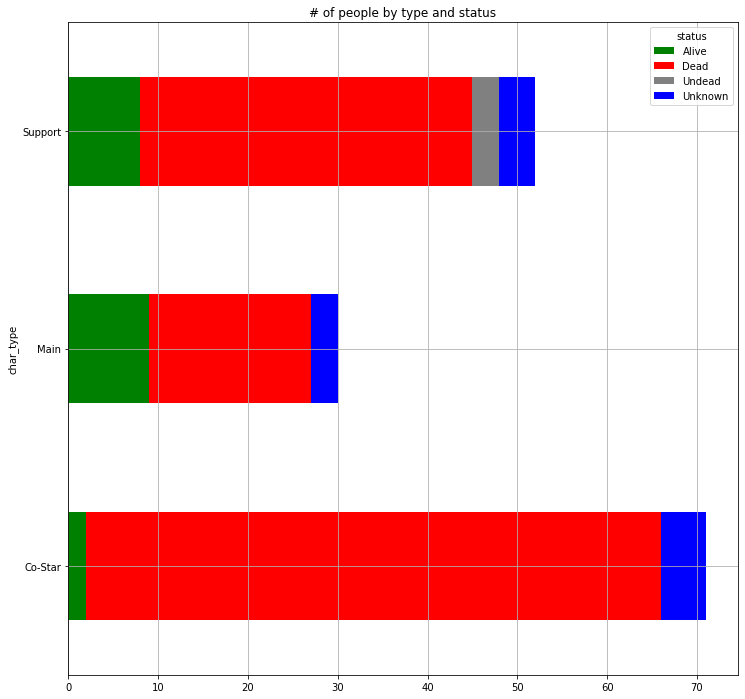

In [129]:
type_st_df.plot(kind='barh', stacked=True, figsize=(12, 12), color=['green', 'red', 'gray', 'blue'], title='# of people by type and status', grid=True)

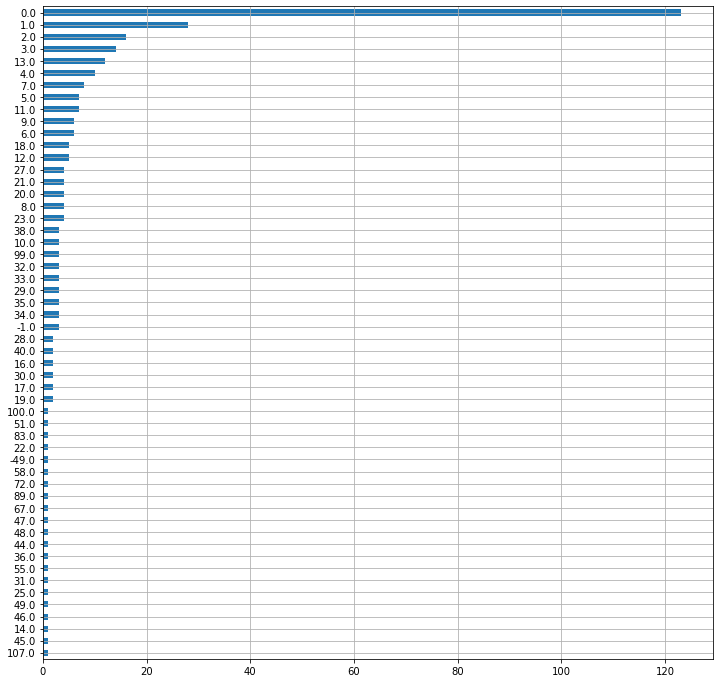

In [130]:
df['ttl_num'].value_counts()[::-1].plot(kind='barh', figsize=(12, 12), grid=True)

In [131]:
df['ttl_num'].value_counts()

 0.0      123
 1.0       28
 2.0       16
 3.0       14
 13.0      12
 4.0       10
 7.0        8
 5.0        7
 11.0       7
 9.0        6
 6.0        6
 18.0       5
 12.0       5
 27.0       4
 21.0       4
 20.0       4
 8.0        4
 23.0       4
 38.0       3
 10.0       3
 99.0       3
 32.0       3
 33.0       3
 29.0       3
 35.0       3
 34.0       3
-1.0        3
 28.0       2
 40.0       2
 16.0       2
 30.0       2
 17.0       2
 19.0       2
 100.0      1
 51.0       1
 83.0       1
 22.0       1
-49.0       1
 58.0       1
 72.0       1
 89.0       1
 67.0       1
 47.0       1
 48.0       1
 44.0       1
 36.0       1
 55.0       1
 31.0       1
 25.0       1
 49.0       1
 46.0       1
 14.0       1
 45.0       1
 107.0      1
Name: ttl_num, dtype: int64

In [132]:
df['ttl_num'].value_counts().sum()

327

In [133]:
(df['ttl_num'].isna()).sum()

116

In [134]:
df.shape

(443, 17)

In [135]:
df[df['ttl_num'] == -1]

,id,link,group,subgroup,status,first_ep,first_ep_link,was_alive,death_ep,death_ep_link,main_character,support_character,co_star,char_type,first_ep_num,death_ep_num,ttl_num
40,Annette Greene (TV Series),https://walkingdead.fandom.com/wiki/Annette_Gr...,4 Greene Farm,4.1 Greene Family,Dead,Save the Last One,Save_the_Last_One,True,Bloodletting,Bloodletting,False,False,False,None,9,8.0,-1.0
41,Shawn Greene (TV Series),https://walkingdead.fandom.com/wiki/Shawn_Gree...,4 Greene Farm,4.1 Greene Family,Dead,Save the Last One,Save_the_Last_One,True,Bloodletting,Bloodletting,False,False,False,None,9,8.0,-1.0
378,Bernie (TV Series),https://walkingdead.fandom.com/wiki/Bernie_(TV...,29 Magna's Group,None,Dead,Stradivarius,Stradivarius,False,Who Are You Now?,Who_Are_You_Now%3F,False,False,False,None,122,121.0,-1.0


In [136]:
df['ttl_num'].value_counts().sort_index()

-49.0       1
-1.0        3
 0.0      123
 1.0       28
 2.0       16
 3.0       14
 4.0       10
 5.0        7
 6.0        6
 7.0        8
 8.0        4
 9.0        6
 10.0       3
 11.0       7
 12.0       5
 13.0      12
 14.0       1
 16.0       2
 17.0       2
 18.0       5
 19.0       2
 20.0       4
 21.0       4
 22.0       1
 23.0       4
 25.0       1
 27.0       4
 28.0       2
 29.0       3
 30.0       2
 31.0       1
 32.0       3
 33.0       3
 34.0       3
 35.0       3
 36.0       1
 38.0       3
 40.0       2
 44.0       1
 45.0       1
 46.0       1
 47.0       1
 48.0       1
 49.0       1
 51.0       1
 55.0       1
 58.0       1
 67.0       1
 72.0       1
 83.0       1
 89.0       1
 99.0       3
 100.0      1
 107.0      1
Name: ttl_num, dtype: int64

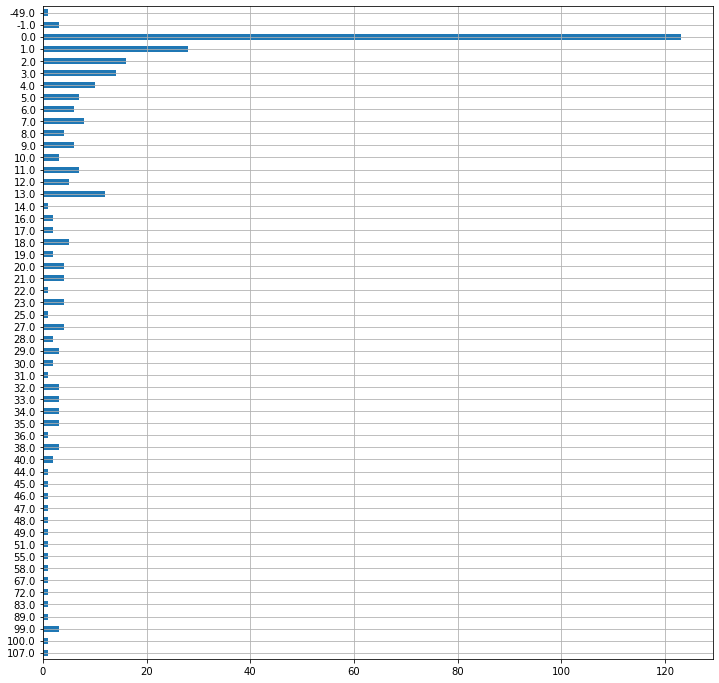

In [137]:
df['ttl_num'].value_counts().sort_index()[::-1].plot(kind='barh', figsize=(12, 12), grid=True)

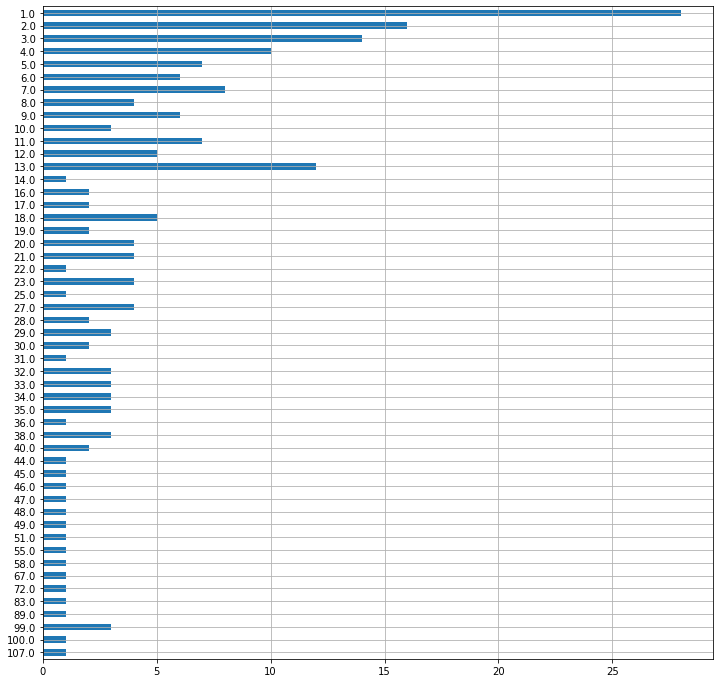

In [138]:
df[df['ttl_num'] > 0]['ttl_num'].value_counts().sort_index()[::-1].plot(kind='barh', figsize=(12, 12), grid=True)

In [139]:
df[df['ttl_num'] > 40][['id', 'group', 'subgroup', 'first_ep', 'death_ep', 'first_ep_num', 'death_ep_num', 'ttl_num']]

,id,group,subgroup,first_ep,death_ep,first_ep_num,death_ep_num,ttl_num
3,Carl Grimes (TV Series),"1 King County, Georgia",1.1 Grimes Family,Days Gone Bye,Honor,1,108.0,107.0
14,Glenn Rhee (TV Series),"2 Atlanta, Georgia",2.1 Atlanta Camp Survivors,Days Gone Bye,The Day Will Come When You Won't Be,1,84.0,83.0
26,Morales (TV Series),"2 Atlanta, Georgia",2.1.4 Morales Family,Guts,Monsters,2,102.0,100.0
27,Miranda Morales (TV Series),"2 Atlanta, Georgia",2.1.4 Morales Family,Tell It to the Frogs,Monsters,3,102.0,99.0
28,Louis Morales (TV Series),"2 Atlanta, Georgia",2.1.4 Morales Family,Tell It to the Frogs,Monsters,3,102.0,99.0
29,Eliza Morales (TV Series),"2 Atlanta, Georgia",2.1.4 Morales Family,Tell It to the Frogs,Monsters,3,102.0,99.0
38,Beth Greene (TV Series),4 Greene Farm,4.1 Greene Family,Bloodletting,Coda,8,59.0,51.0
97,Sasha Williams (TV Series),10 Tyreese's Group,10.1 Williams Family,Made to Suffer,The First Day of the Rest of Your Life,27,99.0,72.0
122,Tara Chambler (TV Series),13 Unnamed Apartment Building,13.1 Chambler Family,Live Bait,The Calm Before,41,130.0,89.0
182,Enid (TV Series),19 Alexandria Safe-Zone,None,Remember,The Calm Before,63,130.0,67.0


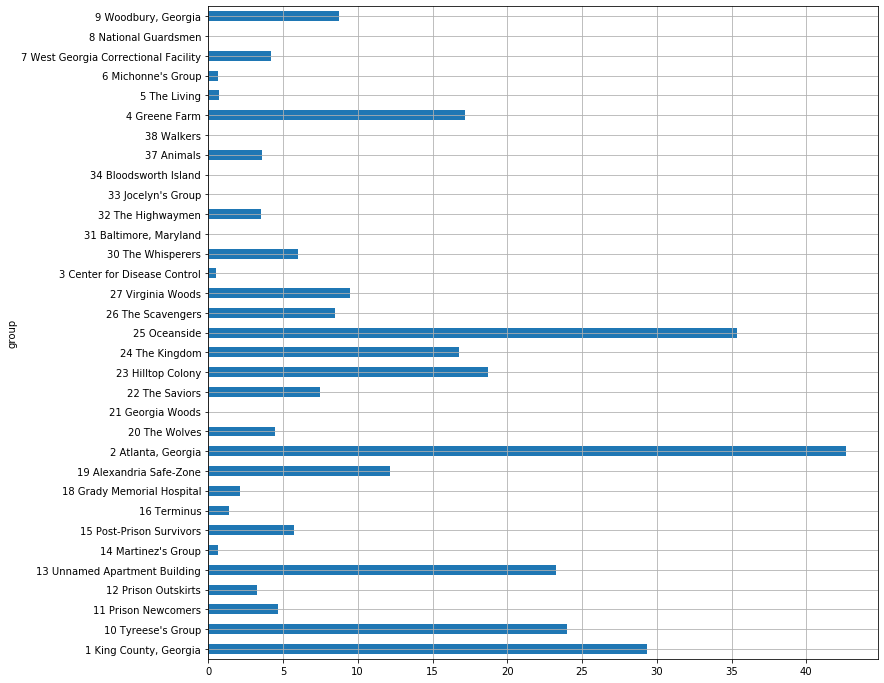

In [140]:
df[df['ttl_num'] >= 0].groupby('group')['ttl_num'].mean().plot(kind='barh', figsize=(12, 12), grid=True)

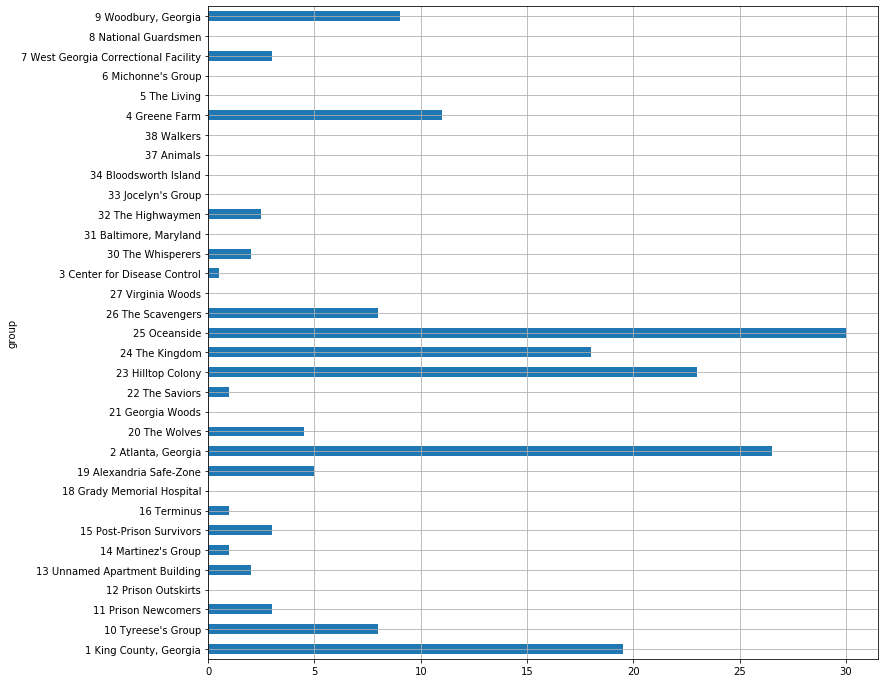

In [141]:
df[df['ttl_num'] >= 0].groupby('group')['ttl_num'].median().plot(kind='barh', figsize=(12, 12), grid=True)

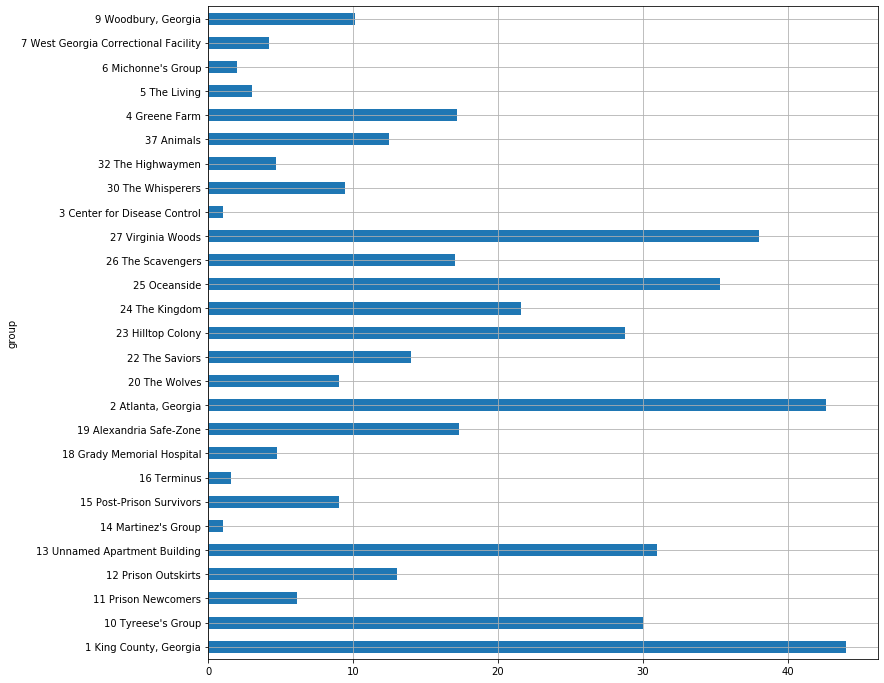

In [142]:
df[df['ttl_num'] > 0].groupby('group')['ttl_num'].mean().plot(kind='barh', figsize=(12, 12), grid=True)

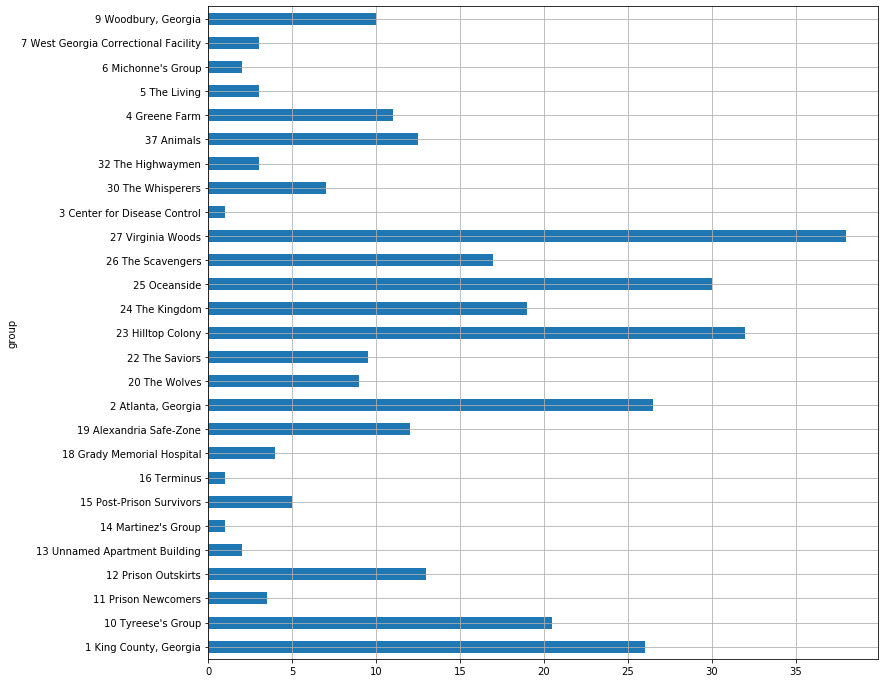

In [143]:
df[df['ttl_num'] > 0].groupby('group')['ttl_num'].median().plot(kind='barh', figsize=(12, 12), grid=True)

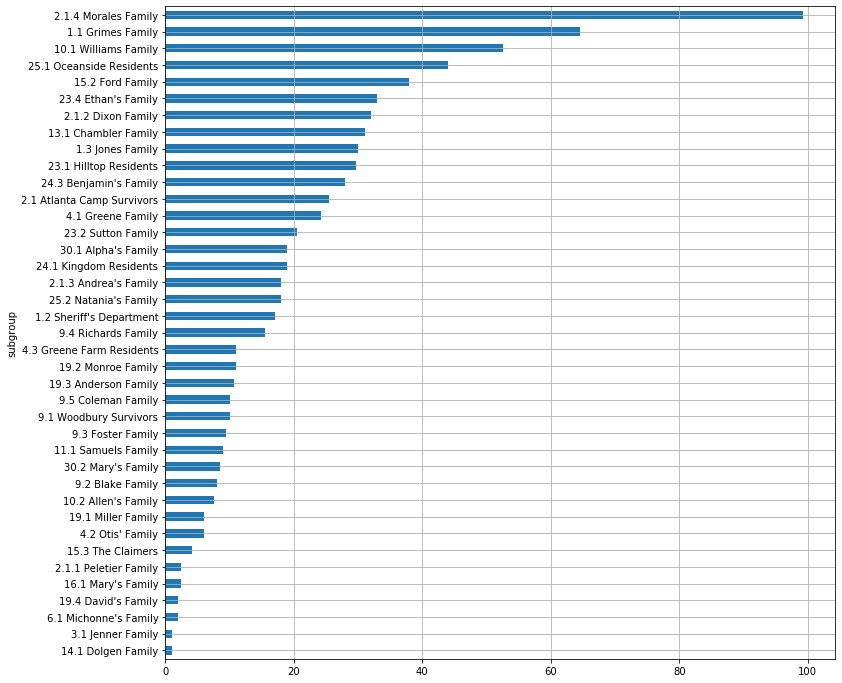

In [144]:
df[df['ttl_num'] > 0].groupby('subgroup')['ttl_num'].mean().sort_values().plot(kind='barh', figsize=(12, 12), grid=True)

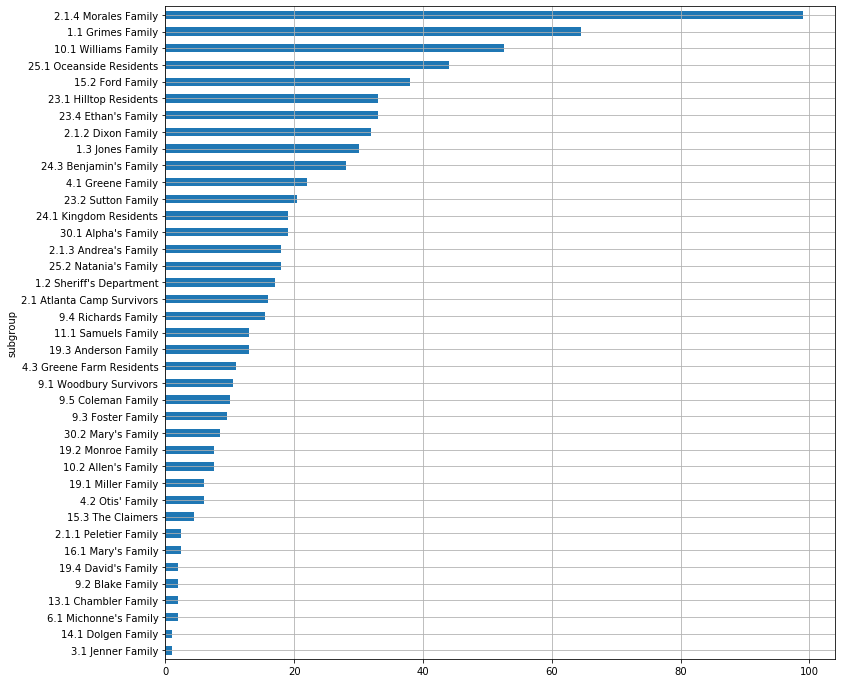

In [145]:
df[df['ttl_num'] > 0].groupby('subgroup')['ttl_num'].median().sort_values().plot(kind='barh', figsize=(12, 12), grid=True)

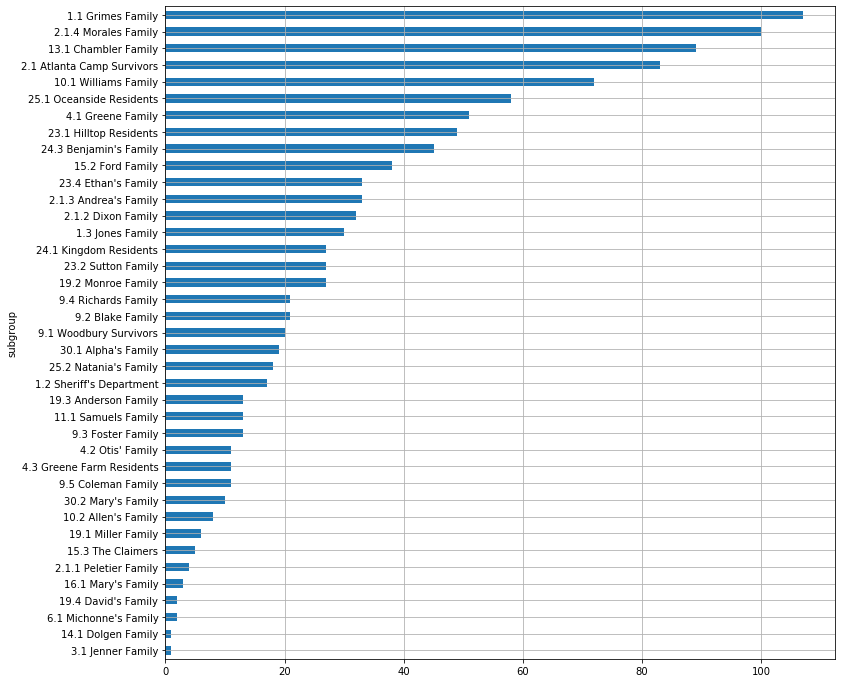

In [146]:
df[df['ttl_num'] > 0].groupby('subgroup')['ttl_num'].max().sort_values().plot(kind='barh', figsize=(12, 12), grid=True)

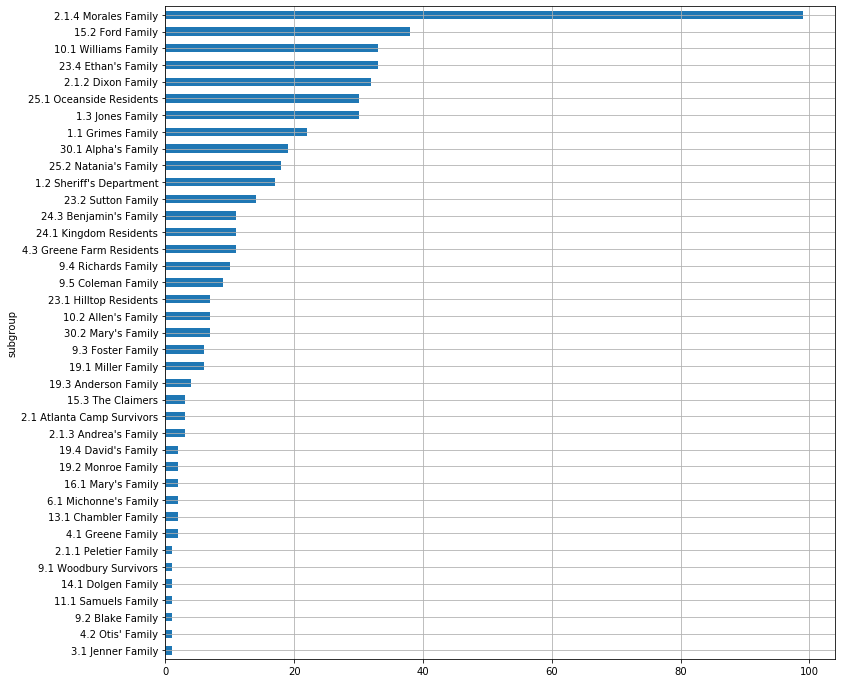

In [147]:
df[df['ttl_num'] > 0].groupby('subgroup')['ttl_num'].min().sort_values().plot(kind='barh', figsize=(12, 12), grid=True)

In [148]:
df_eps['new_alive_num'] = df_eps['episode_total'].apply(lambda x: df[(df['first_ep_num'] == x)]['first_ep_num'].count())
df_eps['new_alive_num_main'] = df_eps['episode_total'].apply(lambda x: df[(df['first_ep_num'] == x) & df['main_character']]['first_ep_num'].count())

In [149]:
df_eps['new_death_num'] = df_eps['episode_total'].apply(lambda x: df[(df['death_ep_num'] == x)]['death_ep_num'].count())
df_eps['new_death_num_main'] = df_eps['episode_total'].apply(lambda x: df[(df['death_ep_num'] == x) & df['main_character']]['death_ep_num'].count())

In [150]:
df_eps['alive_num'] = df_eps['new_alive_num'].cumsum() - df_eps['new_death_num'].cumsum()
df_eps['alive_num_main'] = df_eps['new_alive_num_main'].cumsum() - df_eps['new_death_num_main'].cumsum()

In [151]:
df_eps.loc[30:40]

,episode,season,name,link,episode_total,title,season_num,new_alive_num,new_alive_num_main,new_death_num,new_death_num_main,alive_num,alive_num_main
30,12,Season 3,Clear,https://walkingdead.fandom.com/wiki/Clear,31,Clear,3,1,0,2,0,50,15
31,13,Season 3,Arrow on the Doorpost,https://walkingdead.fandom.com/wiki/Arrow_on_t...,32,Arrow_on_the_Doorpost,3,0,0,0,0,50,15
32,14,Season 3,Prey,https://walkingdead.fandom.com/wiki/Prey,33,Prey,3,0,0,0,0,50,15
33,15,Season 3,This Sorrowful Life,https://walkingdead.fandom.com/wiki/This_Sorro...,34,This_Sorrowful_Life_(TV_Series),3,0,0,2,1,48,14
34,16,Season 3,Welcome to the Tombs,https://walkingdead.fandom.com/wiki/Welcome_to...,35,Welcome_to_the_Tombs,3,2,0,12,1,38,13
35,1,Season 4,30 Days Without An Accident,https://walkingdead.fandom.com/wiki/30_Days_Wi...,36,30_Days_Without_An_Accident,4,18,0,6,0,50,13
36,2,Season 4,Infected,https://walkingdead.fandom.com/wiki/Infected,37,Infected,4,3,0,8,0,45,13
37,3,Season 4,Isolation,https://walkingdead.fandom.com/wiki/Isolation,38,Isolation,4,0,0,0,0,45,13
38,4,Season 4,Indifference,https://walkingdead.fandom.com/wiki/Indifference,39,Indifference,4,3,0,2,0,46,13
39,5,Season 4,Internment,https://walkingdead.fandom.com/wiki/Internment,40,Internment,4,1,0,4,0,43,13


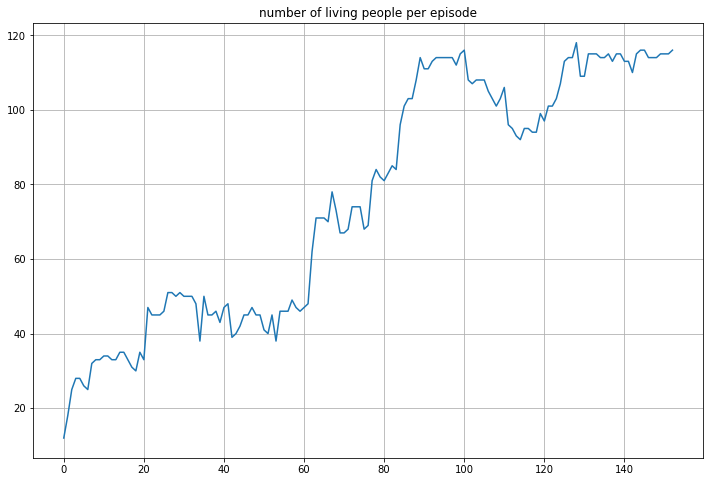

In [152]:
df_eps['alive_num'].plot(figsize=(12, 8), grid=True, title='number of living people per episode')

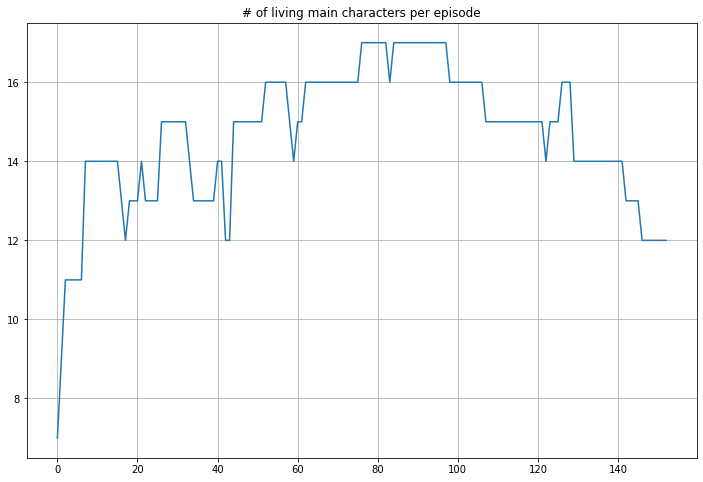

In [153]:
df_eps['alive_num_main'].plot(figsize=(12, 8), grid=True, title='# of living main characters per episode')

In [155]:
df_season = df_eps.groupby('season_num')[['season_num', 'season']].first()
df_season['season_num'] = df_season['season_num'].astype(int)
df_season = df_season.set_index(df_season['season_num'])
df_season

,season_num,season
season_num,,
1,1,Season 1
2,2,Season 2
3,3,Season 3
4,4,Season 4
5,5,Season 5
6,6,Season 6
7,7,Season 7
8,8,Season 8
9,9,Season 9


In [157]:
df_season['last_ep'] = df_eps.groupby('season_num')['episode_total'].max()

In [170]:
df['first_season_num'] = df['first_ep_num'].apply(lambda x: int(df_eps[df_eps['episode_total'] == x]['season_num']))
df['death_season_num'] = df['death_ep_num'].apply(lambda x: None if np.isnan(x) else int(df_eps[df_eps['episode_total'] == x]['season_num']))

In [171]:
df_season['new_death_num'] = df_season['season_num'].apply(lambda x: df[(df['death_season_num'] == x)]['death_ep_num'].count())
df_season['alive_num'] = df_season['new_alive_num'].cumsum() - df_season['new_death_num'].cumsum()
df_season['new_alive_num'] = df_season['season_num'].apply(lambda x: df[(df['first_season_num'] == x)]['first_season_num'].count())

In [ ]:
df_season

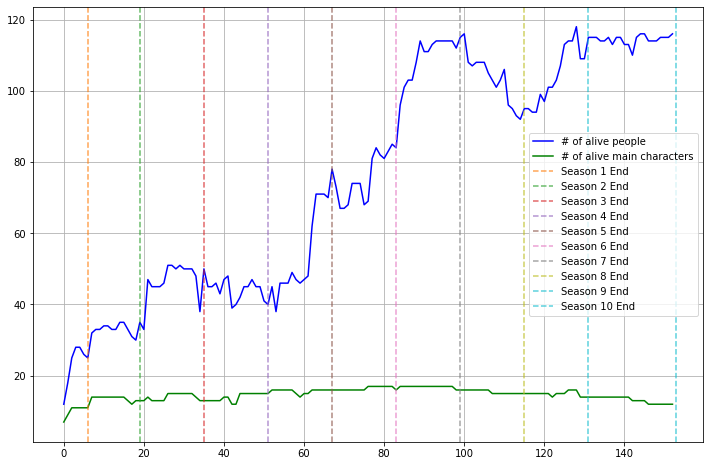

In [158]:
fig = plt.figure(figsize=(12, 8))
df_eps['alive_num'].rename('# of alive people').plot(fig=fig, grid=True, color='blue')
df_eps['alive_num_main'].rename('# of alive main characters').plot(fig=fig, grid=True, color='green')
cmap = mpl.cm.get_cmap('tab10')
for idx, row in df_season.iterrows():
    plt.axvline(row['last_ep'], 0, 1, label=row['season']+' End', linestyle='--', alpha=0.7, color=cmap(idx))
plt.legend()
plt.show()

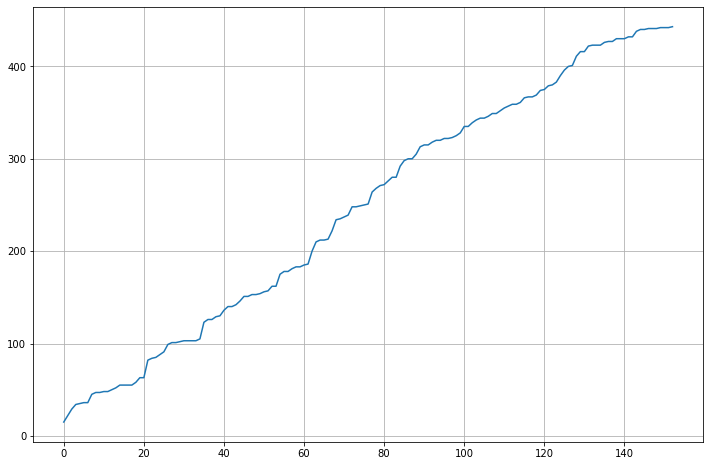

In [160]:
df_eps['episode_total'].apply(lambda x: df[(df['first_ep_num'] <= x)]['first_ep_num'].count()).plot(figsize=(12, 8), grid=True)

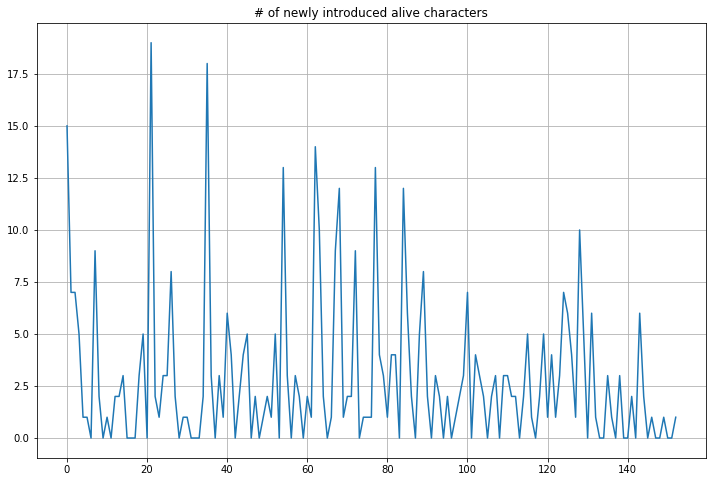

In [161]:
df_eps['new_alive_num'].plot(figsize=(12, 8), grid=True, title='# of newly introduced alive characters')

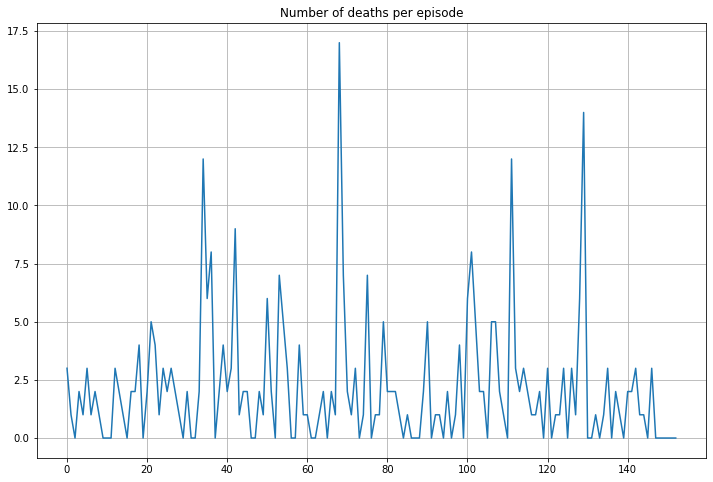

In [162]:
df_eps['new_death_num'].plot(figsize=(12, 8), grid=True, title='Number of deaths per episode')

In [168]:
df

,id,link,group,subgroup,status,first_ep,first_ep_link,was_alive,death_ep,death_ep_link,main_character,support_character,co_star,char_type,first_ep_num,death_ep_num,ttl_num,first_season_num,death_season_num
0,Judith Grimes (TV Series),https://walkingdead.fandom.com/wiki/Judith_Gri...,"King County, Georgia",Grimes Family,Alive,Killer Within,Killer_Within,True,None,NaN,False,True,False,Support,23,NaN,NaN,3,NaN
1,Rick Grimes Jr. (TV Series),https://walkingdead.fandom.com/wiki/Rick_Grime...,"King County, Georgia",Grimes Family,Alive,Who Are You Now?,Who_Are_You_Now%3F,True,None,NaN,False,False,False,None,121,NaN,NaN,9,NaN
2,Rick Grimes (TV Series),https://walkingdead.fandom.com/wiki/Rick_Grime...,"King County, Georgia",Grimes Family,Unknown,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,None,NaN,True,False,False,Main,1,NaN,NaN,1,NaN
3,Carl Grimes (TV Series),https://walkingdead.fandom.com/wiki/Carl_Grime...,"King County, Georgia",Grimes Family,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,Honor,Honor,True,False,False,Main,1,108.0,107.0,1,8.0
4,Lori Grimes (TV Series),https://walkingdead.fandom.com/wiki/Lori_Grime...,"King County, Georgia",Grimes Family,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,Killer Within,Killer_Within,True,False,False,Main,1,23.0,22.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Louise Bush (TV Series),https://walkingdead.fandom.com/wiki/Louise_Bus...,Walkers,None,Dead,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,False,False,None,13,13.0,0.0,2,2.0
434,Wayne Dunlap (TV Series),https://walkingdead.fandom.com/wiki/Wayne_Dunl...,Walkers,None,Dead,Guts,Guts,False,Guts,Guts,False,False,False,None,2,2.0,0.0,1,1.0
435,Summer (TV Series),https://walkingdead.fandom.com/wiki/Summer_(TV...,Walkers,None,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),False,Days Gone Bye,Days_Gone_Bye_(TV_Series),False,False,False,None,1,1.0,0.0,1,1.0
436,Hannah (Webisodes),https://walkingdead.fandom.com/wiki/Hannah_(We...,Walkers,None,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),False,Everything Dies,Everything_Dies,False,False,False,None,1,NaN,NaN,1,NaN


In [167]:
df_season

,season_num,season,last_ep,new_alive_num
season_num,,,,
1,1,Season 1,6,36
2,2,Season 2,19,22
3,3,Season 3,35,47
4,4,Season 4,51,51
5,5,Season 5,67,57
6,6,Season 6,83,67
7,7,Season 7,99,45
8,8,Season 8,115,36
9,9,Season 9,131,55


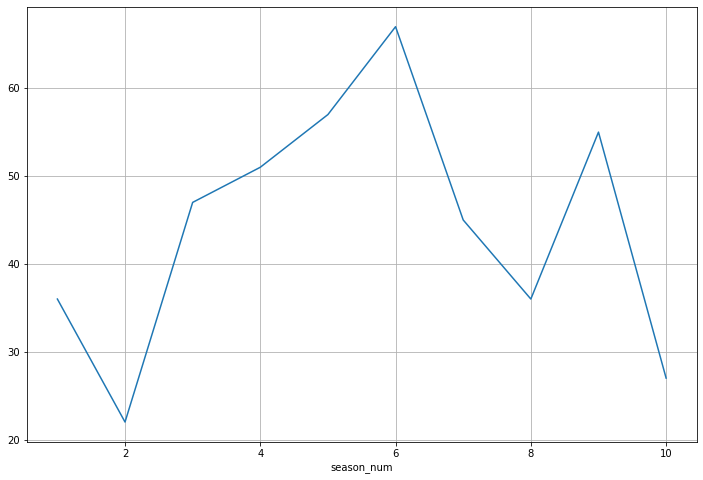

In [168]:
df_season['new_alive_num'].plot(figsize=(12, 8), grid=True)

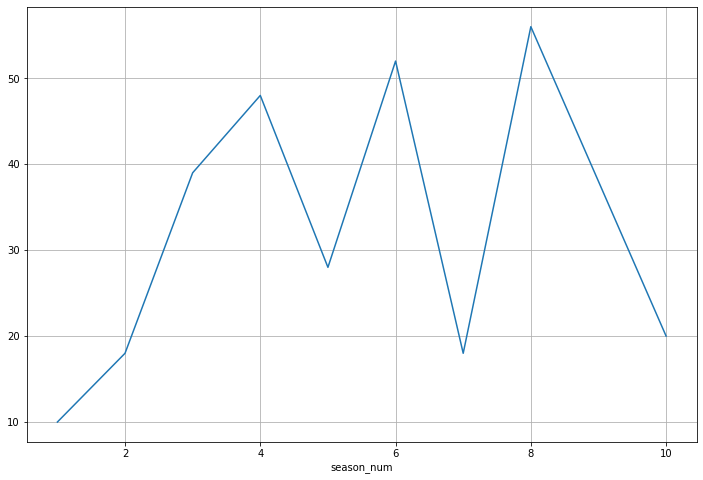

In [172]:
df_season['new_death_num'].plot(figsize=(12, 8), grid=True)

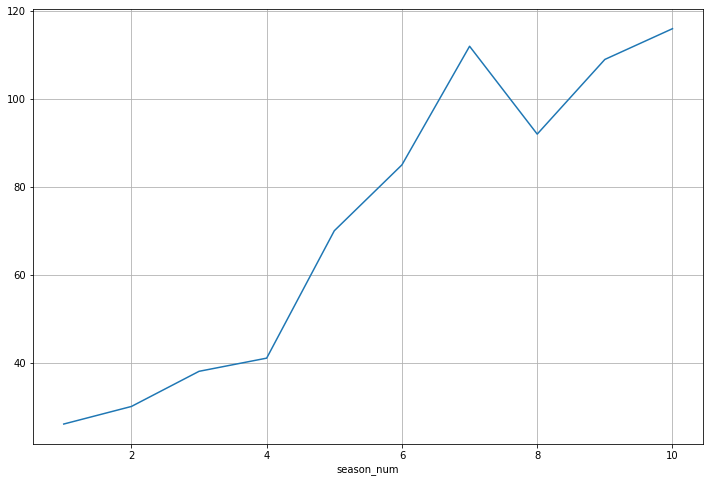

In [173]:
df_season['alive_num'].plot(figsize=(12, 8), grid=True)

In [174]:
df_season['alive_num']

season_num
1      26
2      30
3      38
4      41
5      70
6      85
7     112
8      92
9     109
10    116
Name: alive_num, dtype: int64

In [175]:
df['first_ep_num'].min()

1

In [176]:
int(df_eps[df_eps['episode_total'] == 3]['season_num'])

1

In [177]:
df

,id,link,group,subgroup,status,first_ep,first_ep_link,was_alive,death_ep,death_ep_link,main_character,support_character,co_star,char_type,first_ep_num,death_ep_num,ttl_num,first_season_num,death_season_num
0,Judith Grimes (TV Series),https://walkingdead.fandom.com/wiki/Judith_Gri...,"1 King County, Georgia",1.1 Grimes Family,Alive,Killer Within,Killer_Within,True,None,NaN,False,True,False,Support,23,NaN,NaN,3,NaN
1,Rick Grimes Jr. (TV Series),https://walkingdead.fandom.com/wiki/Rick_Grime...,"1 King County, Georgia",1.1 Grimes Family,Alive,Who Are You Now?,Who_Are_You_Now%3F,True,None,NaN,False,False,False,None,121,NaN,NaN,9,NaN
2,Rick Grimes (TV Series),https://walkingdead.fandom.com/wiki/Rick_Grime...,"1 King County, Georgia",1.1 Grimes Family,Unknown,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,None,NaN,True,False,False,Main,1,NaN,NaN,1,NaN
3,Carl Grimes (TV Series),https://walkingdead.fandom.com/wiki/Carl_Grime...,"1 King County, Georgia",1.1 Grimes Family,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,Honor,Honor,True,False,False,Main,1,108.0,107.0,1,8.0
4,Lori Grimes (TV Series),https://walkingdead.fandom.com/wiki/Lori_Grime...,"1 King County, Georgia",1.1 Grimes Family,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),True,Killer Within,Killer_Within,True,False,False,Main,1,23.0,22.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Doug (TV Series),https://walkingdead.fandom.com/wiki/Doug_(TV_S...,38 Walkers,None,Dead,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,False,False,None,13,13.0,0.0,2,2.0
439,Louise Bush (TV Series),https://walkingdead.fandom.com/wiki/Louise_Bus...,38 Walkers,None,Dead,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,Pretty Much Dead Already,Pretty_Much_Dead_Already,False,False,False,None,13,13.0,0.0,2,2.0
440,Wayne Dunlap (TV Series),https://walkingdead.fandom.com/wiki/Wayne_Dunl...,38 Walkers,None,Dead,Guts,Guts,False,Guts,Guts,False,False,False,None,2,2.0,0.0,1,1.0
441,Summer (TV Series),https://walkingdead.fandom.com/wiki/Summer_(TV...,38 Walkers,None,Dead,Days Gone Bye,Days_Gone_Bye_(TV_Series),False,Days Gone Bye,Days_Gone_Bye_(TV_Series),False,False,False,None,1,1.0,0.0,1,1.0
